In [21]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# System setup

# Change working directory to project folder
os.chdir('/content/drive/MyDrive/Earth-System-Modelling')

# Append project to path for easy imports
sys.path.append('/content/drive/MyDrive/Earth-System-Modelling')

In [24]:
# Import the model
# The model is stored in another file
# all functions are definded there...
from swbm_mini import prepro, predict_ts, model_correlation

# Now you have access to the functions:
# prepro() predict_ts() model_correlation()

# Read the data
data = pd.read_csv("data/Data_swbm_Germany.csv")

# Prepare the data
data_prepro = prepro(data)

In [25]:
# Define initial parameters
config = {
    'c_s': 420,    # soil water holding capacity in mm
    'a': 4,        # runoff function shape α
    'g': 0.5,      # ET function shape γ
    'b0': 0.8      # maximum of ET function β
}


In [26]:
# Run the SWBM model
moisture, runoff, et_flux = predict_ts(data_prepro, config)

In [27]:
# Compute correlation over the whole timeseries
corrs = model_correlation(data_prepro, (moisture, runoff, et_flux))
print("Correlation between observed data and model outputs:\n")
print(f"Soil Moisture (sm):      {corrs['sm']:.3f}")
print(f"Runoff (ro):             {corrs['ro']:.3f}")
print(f"Evapotranspiration (et): {corrs['et']:.3f}")
print(f"\nSum of correlations:   {corrs['sum']:.3f}")

Correlation between observed data and model outputs:

Soil Moisture (sm):      0.878
Runoff (ro):             0.646
Evapotranspiration (et): 0.881

Sum of correlations:   2.405


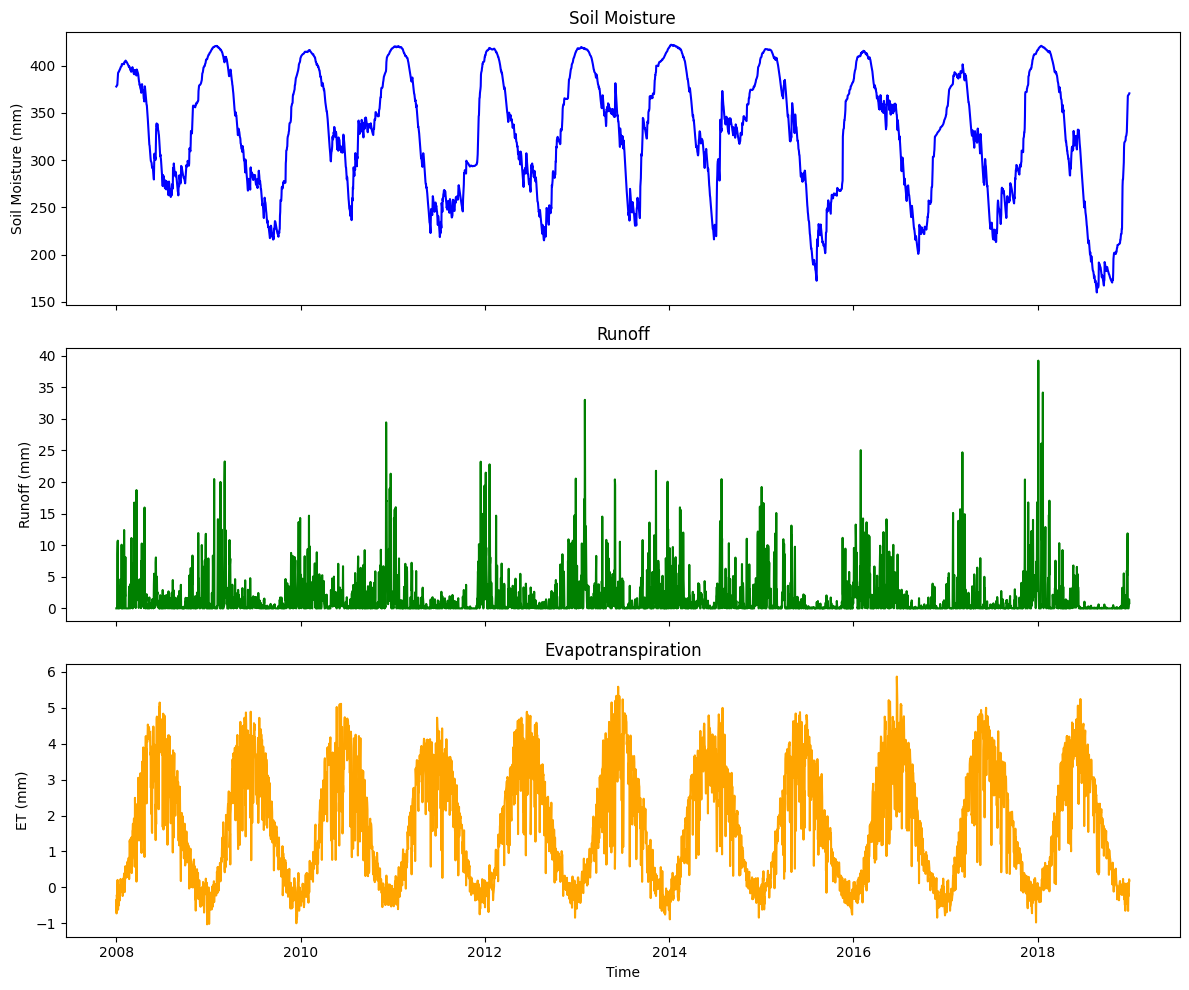

In [28]:
# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Soil moisture
axes[0].plot(data_prepro['time'], moisture, color='blue')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture')

# Runoff
axes[1].plot(data_prepro['time'], runoff, color='green')
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff')

# Evapotranspiration
axes[2].plot(data_prepro['time'], et_flux, color='orange')
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration')
axes[2].set_xlabel('Time')

plt.tight_layout()
plt.show()

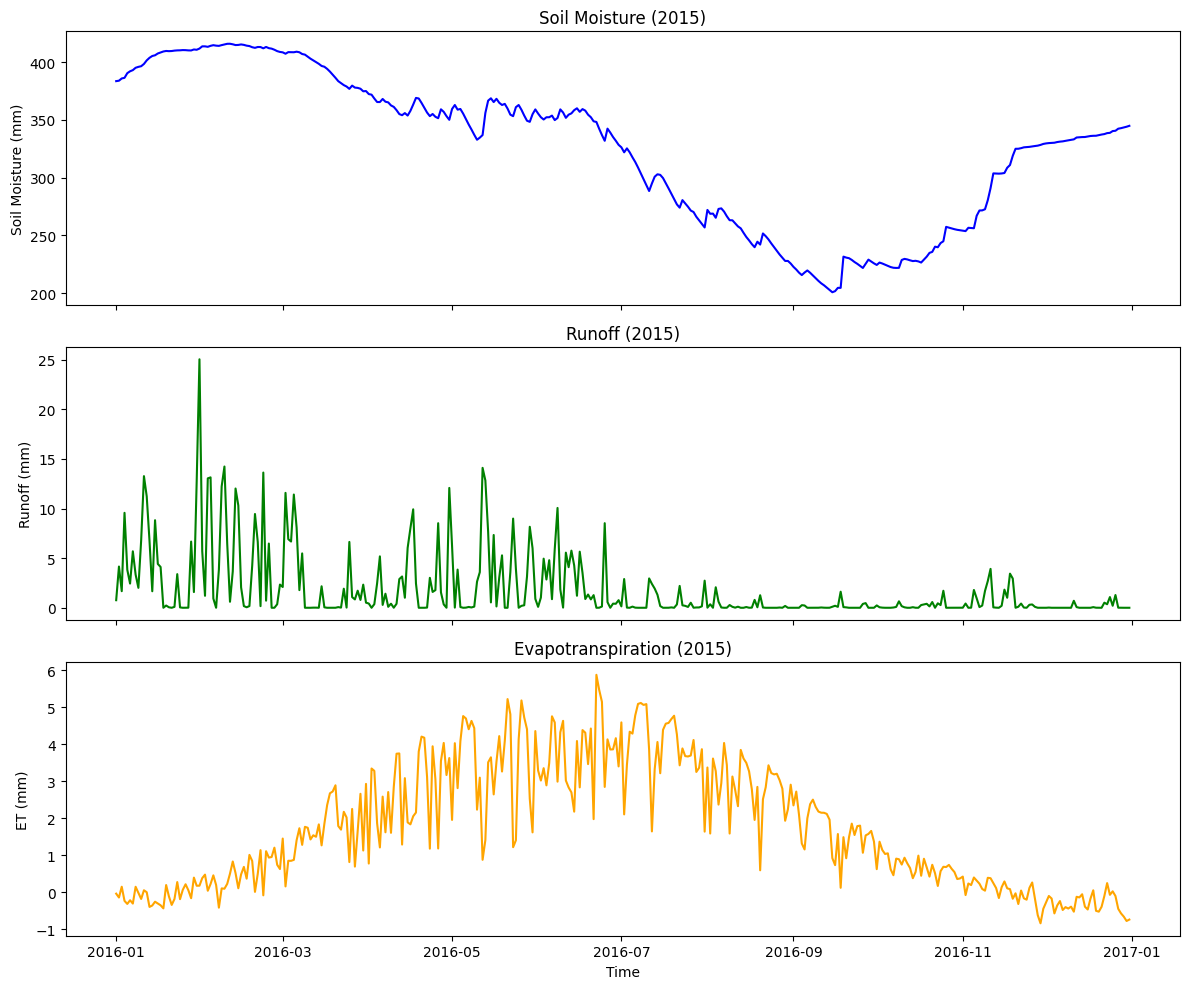

In [17]:
# Plot only one year
one_year = data_prepro[(data_prepro['time'] >= "2016-01-01") & (data_prepro['time'] <= "2016-12-31")]
moisture_year = moisture[one_year.index]
runoff_year = runoff[one_year.index]
et_flux_year = et_flux[one_year.index]
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
# Soil moisture
axes[0].plot(one_year['time'], moisture_year, color='blue')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture (2015)')
# Runoff
axes[1].plot(one_year['time'], runoff_year, color='green')
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff (2015)')
# Evapotranspiration
axes[2].plot(one_year['time'], et_flux_year, color='orange')
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration (2015)')
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()